In [80]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
sys.path.append("..")

from utils import *
from errors import *

from skimage.color import *
from skimage.filters import threshold_otsu
from skimage.morphology import disk
import cv2 as cv


In [81]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

In [82]:
# Loaded a set of images
image_dir = "../../data/test/"

files = os.listdir(image_dir)

n = len(files) # Load maximum 20 images

imgs = [rgb2gray(cv.imread(image_dir + files[i])) for i in range(n)]

print("Size of initial test dataset : " + str(n))

Size of initial test dataset : 6


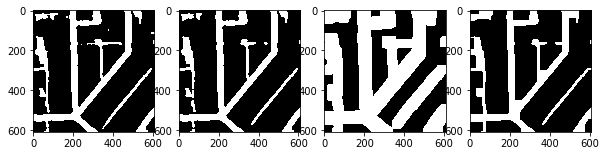

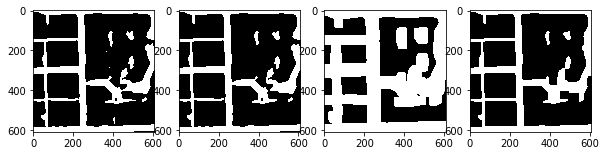

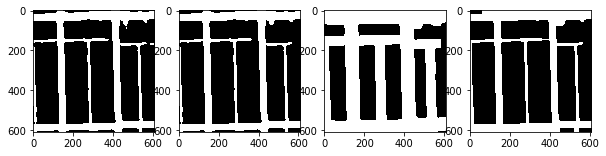

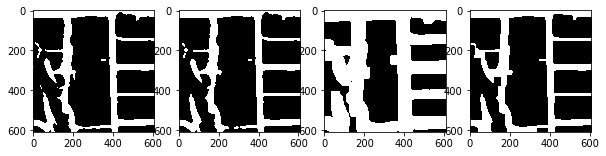

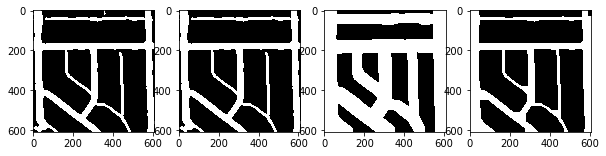

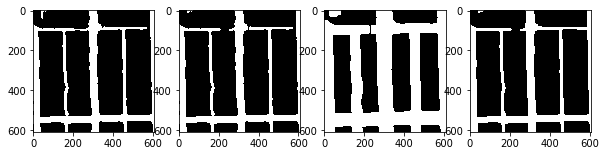

In [132]:
ero_dil = 35
for i in range(n):
    img = []
    img += [np.where(imgs[i].copy() > 0.5, 1, 0).astype('uint8')]
    img += [cv.morphologyEx(img[len(img)-1], cv.MORPH_OPEN, disk(5))]
    img += [cv.dilate(img[len(img)-1], np.ones((ero_dil,ero_dil),np.uint8), iterations = 1)]
    img += [cv.erode(img[len(img)-1], np.ones((ero_dil,ero_dil),np.uint8), iterations = 1)]
    fig, axes = plt.subplots(1, len(img), figsize = (10, 10))
    for j in range(len(img)):
        axes[j].imshow(img[j], cmap='gray')

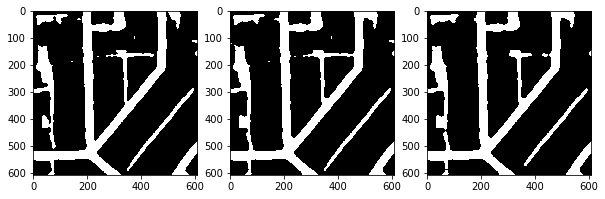

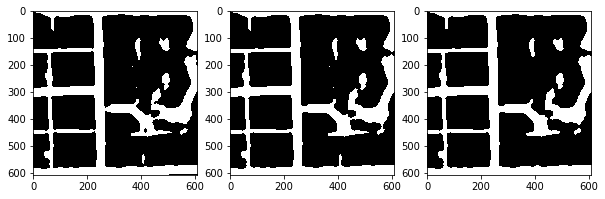

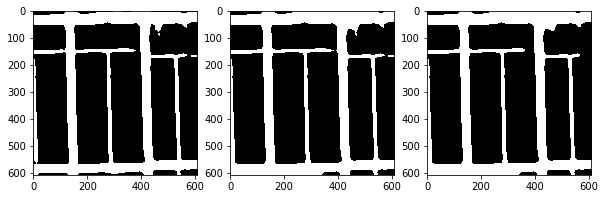

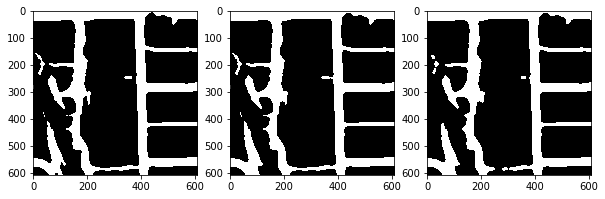

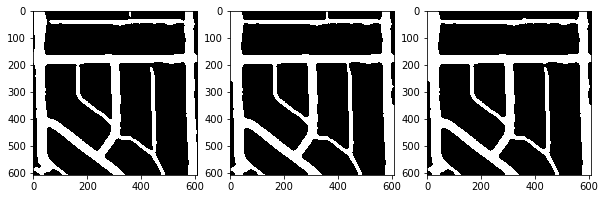

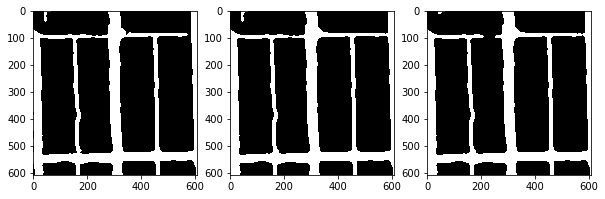

In [145]:
ero_dil = 20
for i in range(n):
    img = []
    img += [np.where(imgs[i].copy() > 0.5, 1, 0).astype('uint8')]
    img += [cv.morphologyEx(img[len(img)-1], cv.MORPH_CLOSE, disk(10))]
    img += [cv.morphologyEx(img[len(img)-1], cv.MORPH_OPEN, disk(5))]
    fig, axes = plt.subplots(1, len(img), figsize = (10, 10))
    for j in range(len(img)):
        axes[j].imshow(img[j], cmap='gray')
